# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)
    
10. [Pomiary czasu](#pomiary)
    - [Chmura punktów](#pomiary-chmura)
        - [Algorytm Grahama](#pomiary-chmura-graham)
        - [Algortym "Górna-dolna"](#pomiary-chumra-gornadolna)
        - [Algorytm Chana](#pomiary-chmura-chan)
        - [Algorytm QuickHull](#pomiary-chmura-quickhull)
        - [Algorytm Jarvisa](#pomiary-chmura-jarvis)
        - [Ujęcie zbiorcze](#pomiary-chmura-zbiorczy)
    - [Punkty na okręgu](#pomiary-kolo)
        - [Algorytm Grahama](#pomiary-kolo-graham)
        - [Algortym "Górna-dolna"](#pomiary-kolo-gornadolna)
        - [Algorytm Chana](#pomiary-kolo-chan)
        - [Algorytm QuickHull](#pomiary-kolo-quickhull)
        - [Algorytm Jarvisa](#pomiary-kolo-jarvis)
        - [Ujęcie zbiorcze](#pomiary-kolo-zbiorczy)
         -[Ujęcie zbiorcze bez Jarvisa](#pomiary-kolo-zbiorczy-2)
    - [Punkty na obwodzie prostokąta](#pomiary-prost)
        - [Algorytm Grahama](#pomiary-prost-graham)
        - [Algortym "Górna-dolna"](#pomiary-prost-gornadolna)
        - [Algorytm Chana](#pomiary-prost-chan)
        - [Algorytm QuickHull](#pomiary-prost-quickhull)
        - [Algorytm Jarvisa](#pomiary-prost-jarvis)
        - [Ujęcie zbiorcze](#pomiary-prost-zbiorczy)
    - [Puntky na kwadracie (2 boki + przekątne)](#pomiary-kw)
        - [Algorytm Grahama](#pomiary-kw-graham)
        - [Algortym "Górna-dolna"](#pomiary-kw-gornadolna)
        - [Algorytm Chana](#pomiary-kw-chan)
        - [Algorytm QuickHull](#pomiary-kw-quickhull)
        - [Algorytm Jarvisa](#pomiary-kw-jarvis)
        - [Ujęcie zbiorcze](#pomiary-kw-zbiorczy)

<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [1]:
from lib import *
import numpy as np
from vis.divide_conq_vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *
from vis.chan_vis import *
from vis.quickhull_vis import *
# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint
from copy import deepcopy

<a id='section_id'></a>

# Funkcje pomocnicze


<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [2]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [3]:
a=makeAset(n=400)
b=makeBset(n=400)
c=makeCset(n=400)
d=makeDset(n=400)

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 14
Punkty otoczki:
array([[ -24, -100],
       [  80, -100],
       [  96,  -98],
       [ 100,  -64],
       [  97,   77],
       [  95,   98],
       [ -36,  100],
       [ -86,   97],
       [ -97,   84],
       [-100,   29],
       [-100,   17],
       [ -93,  -73],
       [ -85,  -88],
       [ -56,  -98]])


<IPython.core.display.Javascript object>


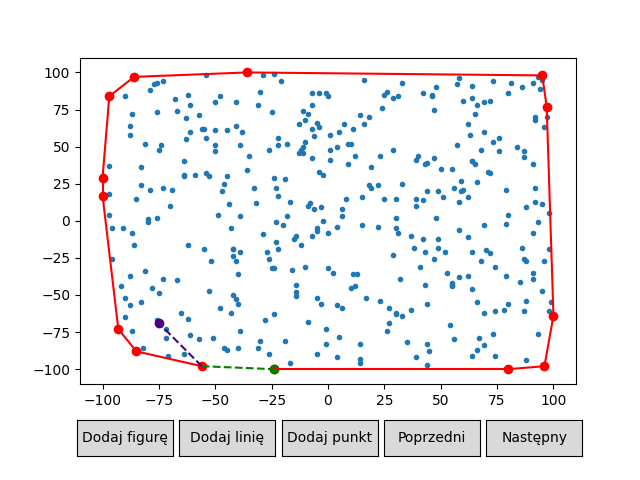

In [4]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 400
Punkty otoczki:
array([[ -0.5084535 , -99.99870737],
       [  0.56629197, -99.99839655],
       [  2.18782427, -99.97606426],
       [  3.08097122, -99.95252681],
       [  7.12191483, -99.74606924],
       [  9.07623374, -99.58725813],
       [  9.36596305, -99.56042756],
       [  9.91452757, -99.50729693],
       [ 10.36545411, -99.46133601],
       [ 10.63943029, -99.43240178],
       [ 14.15498083, -98.99311349],
       [ 15.2942928 , -98.8235023 ],
       [ 20.45441757, -97.88573339],
       [ 24.12216229, -97.04700555],
       [ 24.27675608, -97.00844867],
       [ 25.72945545, -96.63330235],
       [ 25.96316432, -96.57077249],
       [ 26.30019615, -96.47952986],
       [ 27.1612831 , -96.24066033],
       [ 32.03983699, -94.72828957],
       [ 32.46575897, -94.58316179],
       [ 32.8471892 , -94.45137459],
       [ 36.33679972, -93.16456937],
       [ 36.72128148, -93.01369516],
       [ 37.06161396, -92.8786131 ],
       [ 37.22983069, -92.81131

<IPython.core.display.Javascript object>


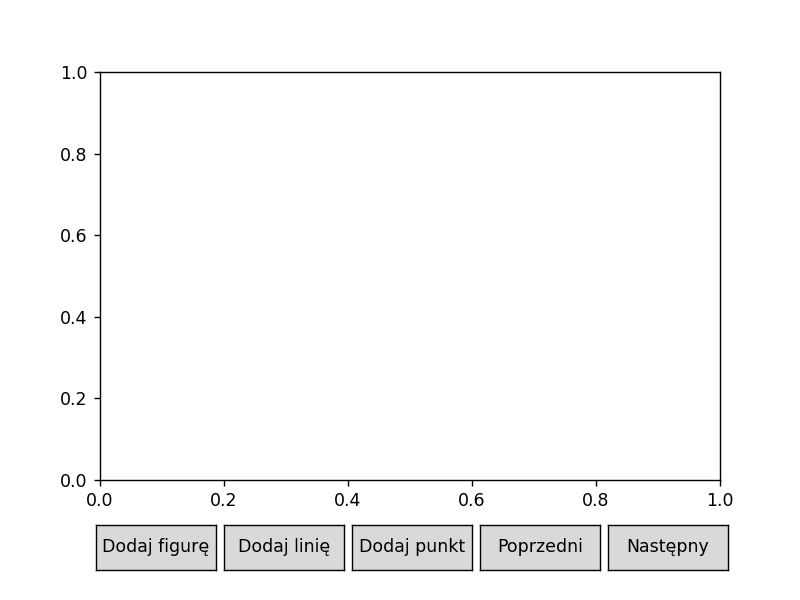

In [5]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
array([[ -99.46154889, -100.        ],
       [  99.77005392, -100.        ],
       [ 100.        ,  -97.16994211],
       [ 100.        ,   96.81529584],
       [  97.15842676,  100.        ],
       [ -93.67086197,  100.        ],
       [-100.        ,   99.52516203],
       [-100.        ,  -99.68512459]])


<IPython.core.display.Javascript object>


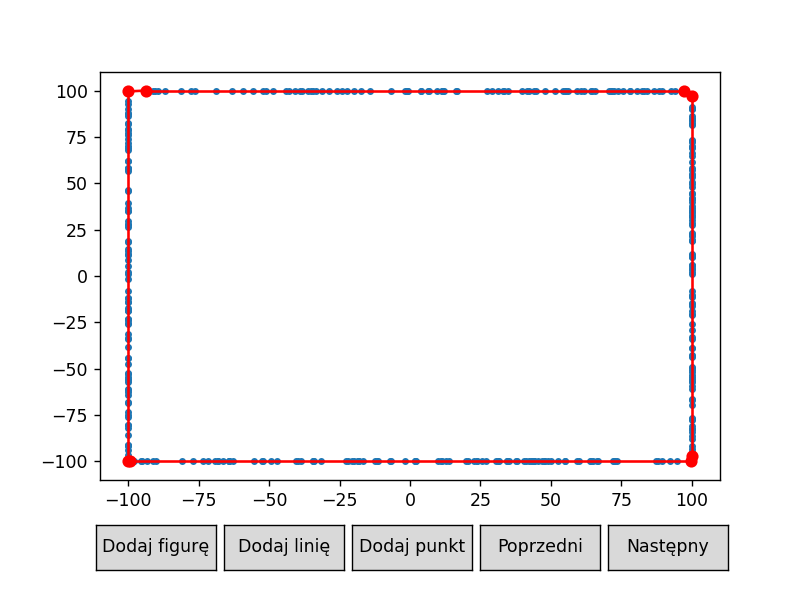

In [6]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

Liczba punktow otoczki: 4
Punkty otoczki:
array([[ 0.,  0.],
       [10.,  0.],
       [10., 10.],
       [ 0., 10.]])


<IPython.core.display.Javascript object>


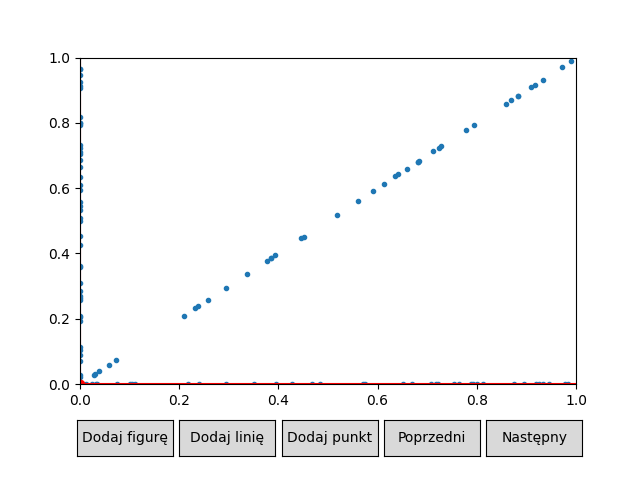

In [60]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 14
Punkty otoczki:
[(-34, -100),
 (71, -100),
 (92, -96),
 (100, -72),
 (100, 8),
 (99, 97),
 (47, 100),
 (-36, 100),
 (-90, 93),
 (-97, 92),
 (-100, 76),
 (-100, -54),
 (-93, -94),
 (-89, -99)]


<IPython.core.display.Javascript object>


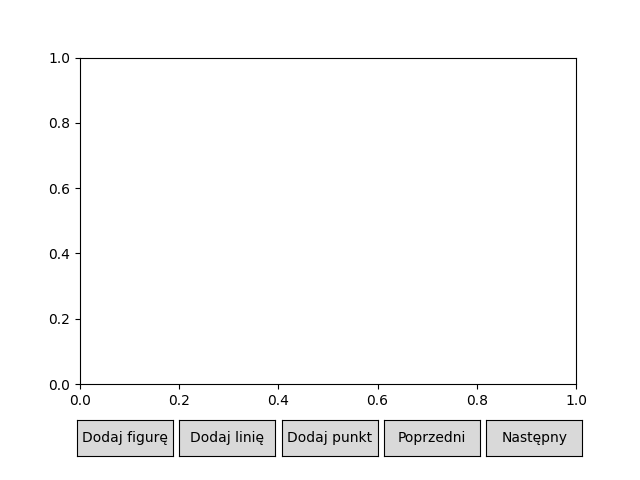

In [61]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 400
Punkty otoczki:
[(0.07505597068212849, -99.99997183300235),
 (0.5053596492546817, -99.99872304997152),
 (1.6898263522748729, -99.98572141510586),
 (1.8835235194004474, -99.98226012224302),
 (1.9746735315215078, -99.98050142124667),
 (3.3581075334352555, -99.94359966397991),
 (6.579400553292765, -99.78332269652745),
 (9.514263438727227, -99.54636503267459),
 (10.091783849287198, -99.48947632156512),
 (10.247291210895543, -99.47357952159508),
 (10.801925053249292, -99.41488025011138),
 (12.873232210619703, -99.1679378249415),
 (13.760955882632754, -99.0486551811595),
 (15.010418088121543, -98.86701850880199),
 (15.90737097589551, -98.7266709082973),
 (16.339433132634184, -98.6560840744461),
 (17.00676355469513, -98.54323920693237),
 (17.57807680162539, -98.44293380408855),
 (17.90026802717905, -98.3848586142967),
 (18.231532683510775, -98.32401139096227),
 (21.30931493309551, -97.70318877642711),
 (21.872420983904096, -97.57867185150079),
 (22.17101972262152, 

<IPython.core.display.Javascript object>


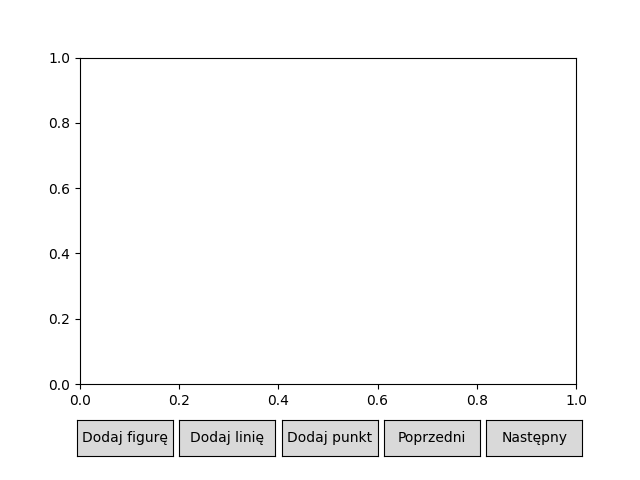

In [62]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-99.6941401710889, -100.0),
 (98.99245597305156, -100.0),
 (100.0, -98.53173203516334),
 (100.0, 98.56681675939217),
 (95.20757236410657, 100.0),
 (-99.8003455929744, 100.0),
 (-100.0, 97.3292921370379),
 (-100.0, -94.9892124197429)]


<IPython.core.display.Javascript object>


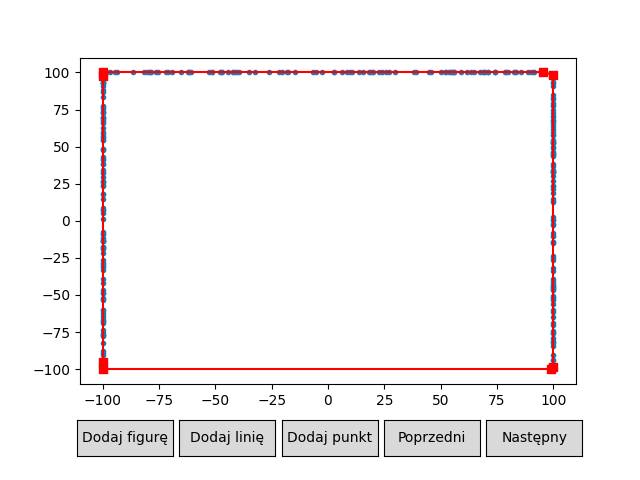

In [63]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

In [ ]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-100.0, -98.84467851727982),
 (-100.0, 97.11149087388856),
 (-99.96929175831906, 100.0),
 (99.28706560901486, 100.0),
 (100.0, 99.37626910042559),
 (100.0, -99.52610531114257),
 (96.7936740892564, -100.0),
 (-98.75638959524534, -100.0)]


<IPython.core.display.Javascript object>


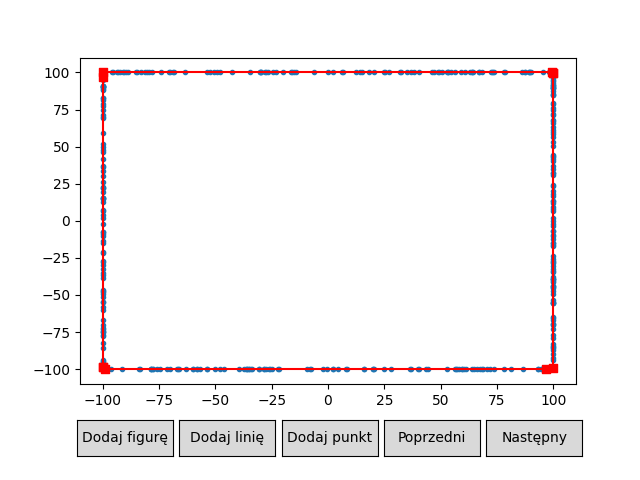

In [36]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


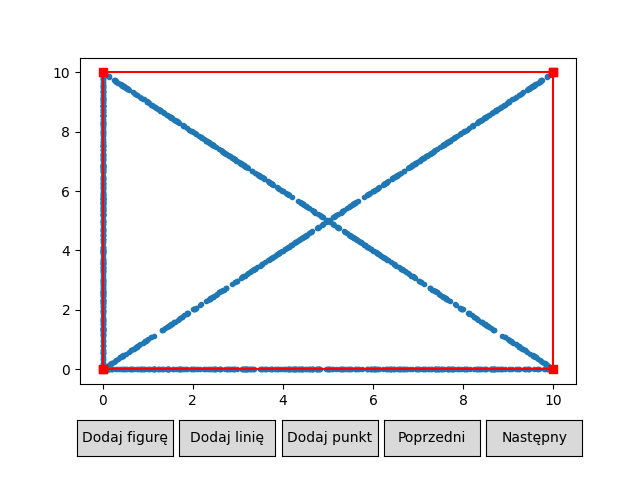

In [37]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 14
Punkty otoczki:
[(-100, -54),
 (-93, -94),
 (-89, -99),
 (-34, -100),
 (71, -100),
 (92, -96),
 (100, -72),
 (100, 8),
 (99, 97),
 (47, 100),
 (-36, 100),
 (-90, 93),
 (-97, 92),
 (-100, 76)]


<IPython.core.display.Javascript object>


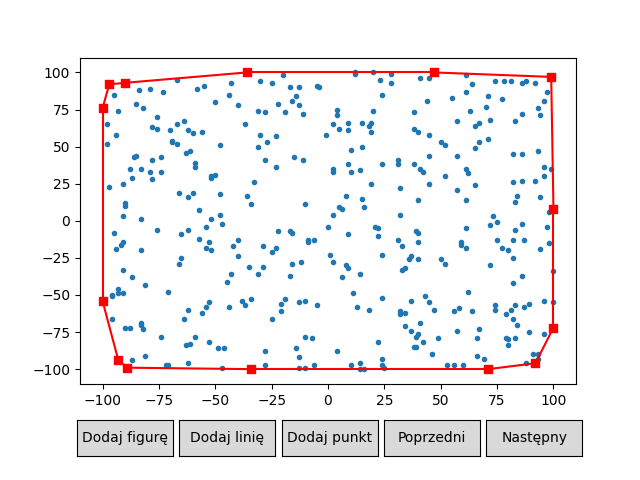

In [64]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [66]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

nie wyznaczono lewej stycznej


TypeError: cannot unpack non-iterable NoneType object

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-100.0, -97.9615999715943),
 (-99.66589649452713, -100.0),
 (99.4773394378461, -100.0),
 (100.0, -98.85436628729042),
 (100.0, 99.93498121051078),
 (94.70147432562459, 100.0),
 (-98.70908370080201, 100.0),
 (-100.0, 98.51320594477522)]


<IPython.core.display.Javascript object>


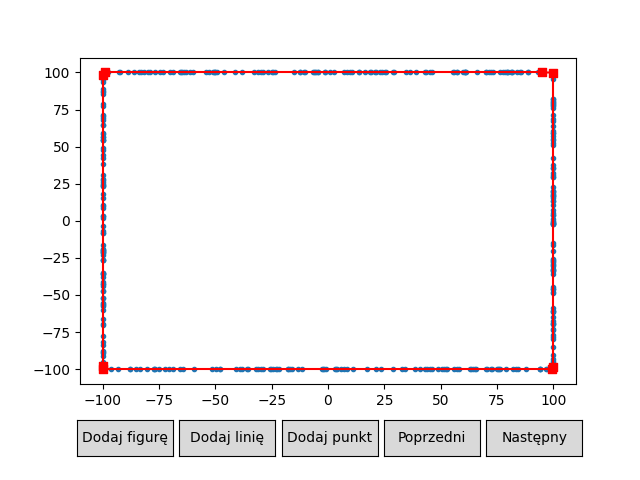

In [7]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

[(0, 0), (10, 0), (10, 10), (0, 10), (3.1014817244798776, 0.0), (0.0, 6.898518275520122), (1.3241159665946578, 0.0), (0.0, 8.675884033405342), (5.842354667515619, 5.842354667515619), (4.157645332484381, 5.842354667515619), (7.764294282362124, 7.764294282362124), (2.2357057176378756, 7.764294282362124)]


<IPython.core.display.Javascript object>


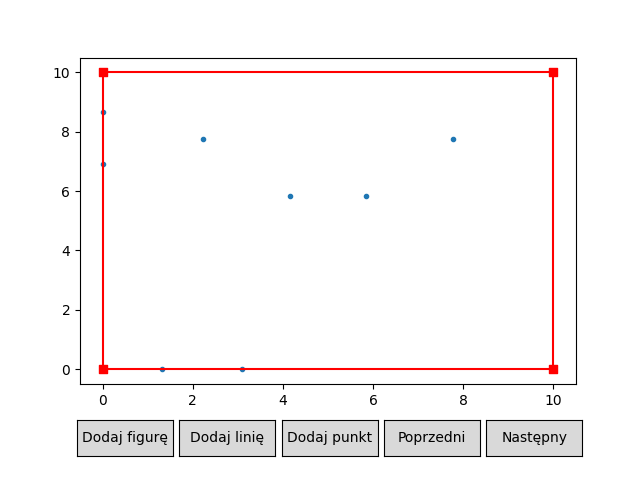

In [8]:
%matplotlib notebook

d = makeDset(n=2)
print(d)
ch, plot = increase_with_sorting_vis(d.copy())

# print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [7]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

KeyboardInterrupt: 

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

%matplotlib notebook

k = 10

a = makeAset(n=400)
ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [26]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow  otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

Liczba punktow  otoczki: 399
Punkty otoczki:
[array([ 2.10412568, 99.97786082]),
 array([-1.22690539, 99.99247323]),
 array([-2.56561895, 99.96708258]),
 array([-3.9121343 , 99.92344672]),
 array([-6.20317972, 99.80741737]),
 array([-8.56992874, 99.63210487]),
 array([-8.93800707, 99.59975918]),
 array([-9.72277396, 99.52621598]),
 array([-11.82839648,  99.29798103]),
 array([-12.47710073,  99.21855652]),
 array([-12.89557494,  99.1650349 ]),
 array([-14.70818249,  98.91243283]),
 array([-18.77008778,  98.22262369]),
 array([-18.95866411,  98.18639954]),
 array([-19.07941738,  98.16300644]),
 array([-20.55166981,  97.86536092]),
 array([-22.20564763,  97.50338052]),
 array([-26.24999882,  96.49319956]),
 array([-26.50491754,  96.4234896 ]),
 array([-26.867115  ,  96.32319623]),
 array([-27.93335331,  96.01941352]),
 array([-31.5096081 ,  94.90597767]),
 array([-31.53765364,  94.89666171]),
 array([-33.4439633 ,  94.24171751]),
 array([-36.59634503,  93.06292242]),
 array([-38.34790818,

<IPython.core.display.Javascript object>

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:


<IPython.core.display.Javascript object>


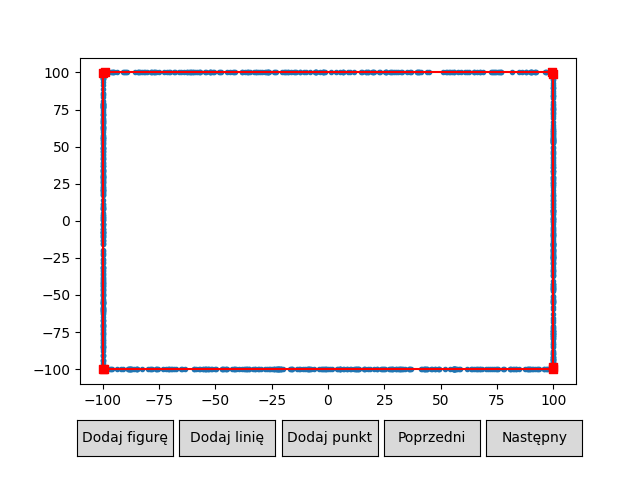

In [27]:
%matplotlib notebook

k = 5

ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()


<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[array([ 0., 10.]), array([0., 0.]), array([10.,  0.]), array([10., 10.])]


<IPython.core.display.Javascript object>


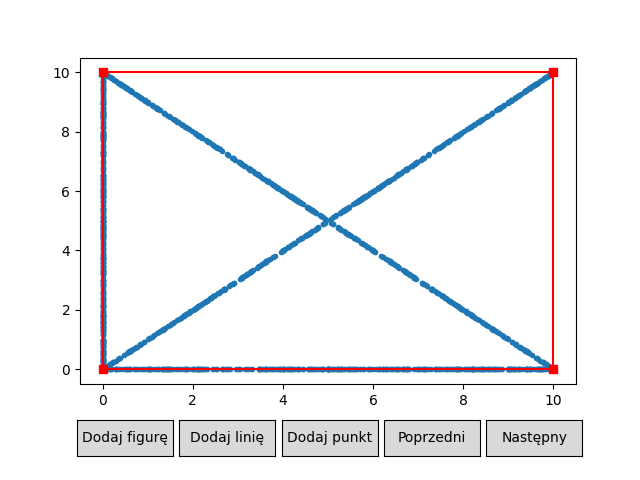

In [28]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [29]:
%matplotlib notebook
a = makeAset(n=100)
plot=chan_vis(a,visual=True)
plot.draw()

<IPython.core.display.Javascript object>

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


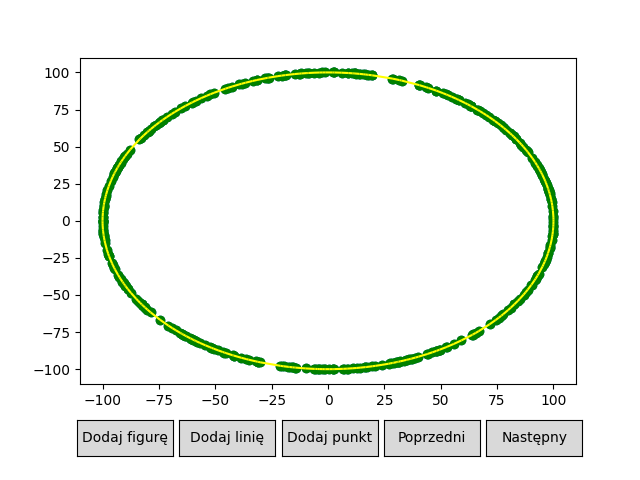

In [5]:
%matplotlib notebook
plot=chan_vis(b,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


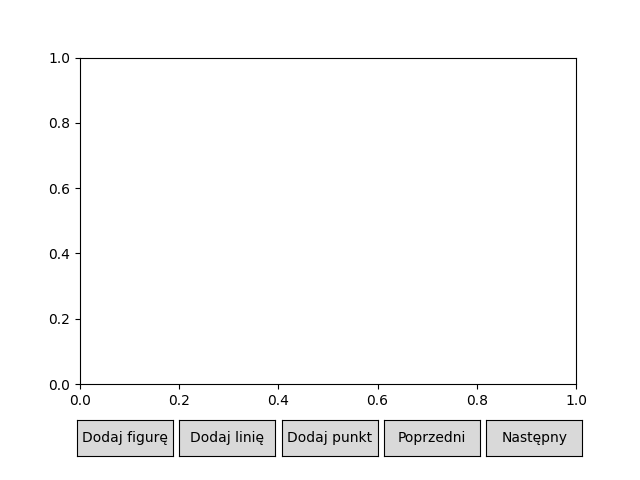

In [30]:
%matplotlib notebook

plot=chan_vis(c,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

tangent_l UTIL zwraca NONE
(9.89204578275619, 0.10795421724380971)
[(0.9853990929371437, 0.0),
 (10, 0),
 (5.374278893576005, 5.374278893576005),
 (2.425145042365445, 7.574854957634555),
 (0.0, 6.511912852760384),
 (0.0, 4.284424024517305),
 (0.08692801607750877, 0.08692801607750877)]
(5.374278893576005, 5.374278893576005) (10, 0)
tangent_l UTIL zwraca NONE
(9.89204578275619, 0.10795421724380971)
[(2.25982532384719, 0.0),
 (7.074981755749449, 0.0),
 (9.91307198392249, 0.08692801607750877),
 (10, 10),
 (0.0, 9.014600907062857),
 (0.0, 2.0856608037727886)]
(10, 10) (9.91307198392249, 0.08692801607750877)
tangent_l UTIL zwraca NONE
(9.89204578275619, 0.10795421724380971)
[(5.022520610274733, 0.0),
 (9.003356802945678, 0.0),
 (9.950405002847688, 0.049594997152311304),
 (6.841599271938209, 6.841599271938209),
 (0.5394417599971817, 9.460558240002818),
 (0.0, 2.7666496643786376),
 (0.0, 0.7571043760503784),
 (0.14431848888546983, 0.14431848888546983)]
(6.841599271938209, 6.841599271938209) (9

<IPython.core.display.Javascript object>


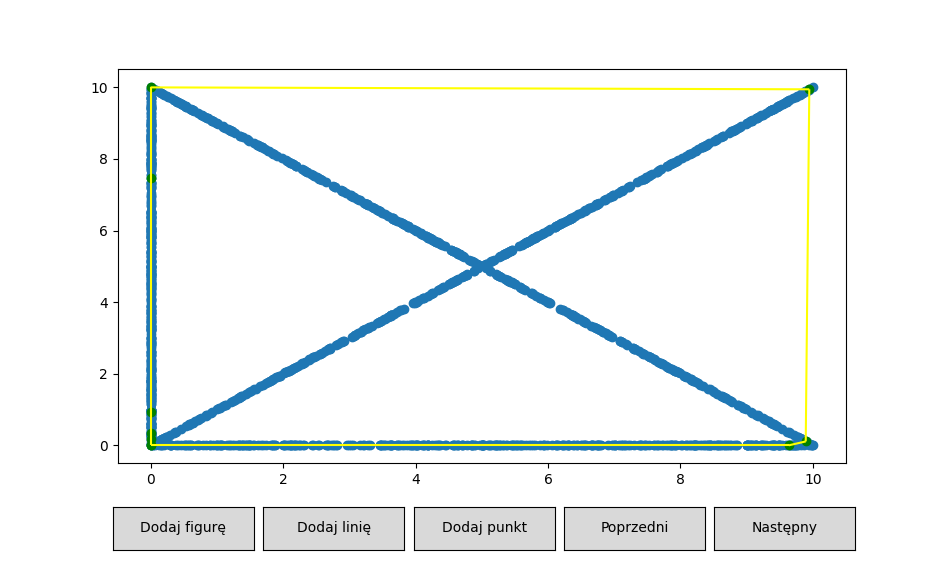

In [31]:
%matplotlib notebook
plot=chan_vis(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


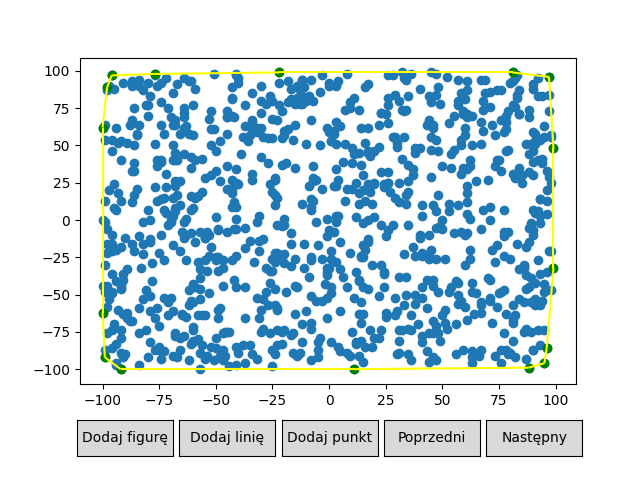

In [32]:
%matplotlib notebook

a = makeAset(n = 1000)
plot=quickHull_vis(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


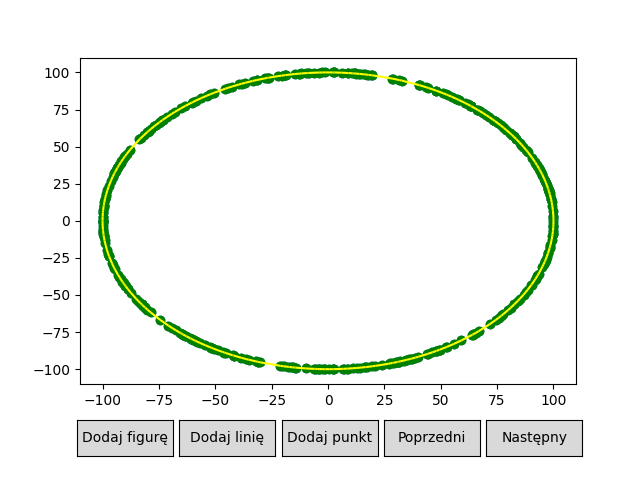

In [33]:
%matplotlib notebook
plot=quickHull_vis(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


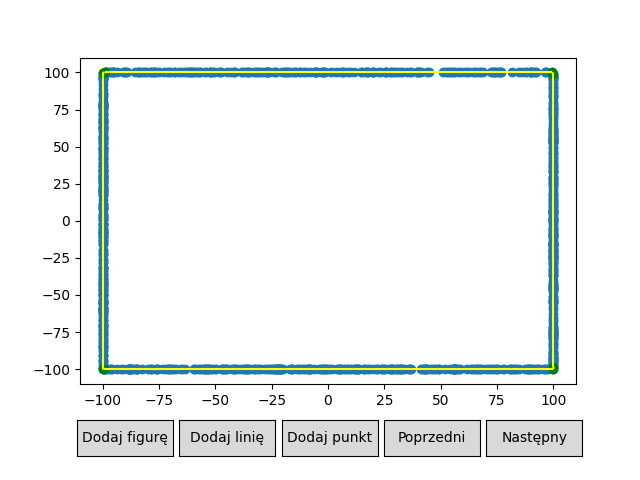

In [34]:
%matplotlib notebook
plot=quickHull_vis(c,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


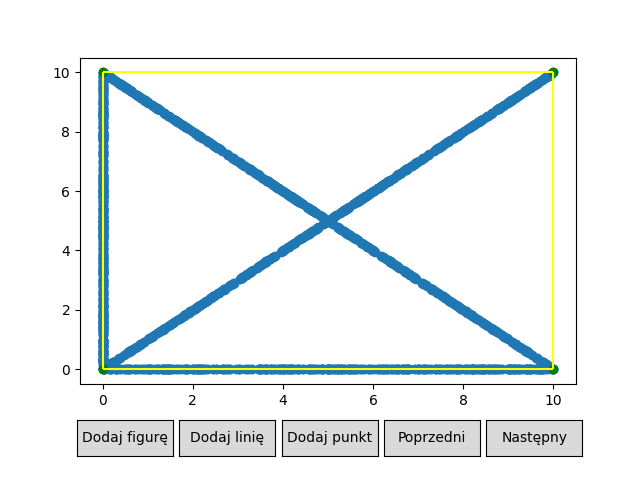

In [35]:
%matplotlib notebook
plot=quickHull_vis(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>

[Spis treści](#spis)


### Funkcja do pomiaru czasów i wizualizacji wyników

<a id='section_id'></a>

In [6]:
import time


from pure.graham import *
from pure.jarvis import *
from pure.divide_conq import *
from pure.chan import *
from pure.increase import *
from pure.lowerupper import *
from pure.quickhull import *

from lib.timemeasure import *

def generate_plot(xdatas, ydatas, xlabel, ylabel, title):
    for xdata, ydata in zip(xdatas, ydatas):
        plt.plot(xdata, ydata, ls = '--')
        plt.scatter(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

ModuleNotFoundError: No module named 'pure.chan'

## Pomiary

<a id="pomiary-chmura"></a>
### Chmura punktów  
[Spis treści](#spis)

<a id='section_id'></a>

In [8]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 400 for i in range(10) ]

funcs = [graham, lower_upper, chan, quickHull, divide_conq, jarvis]

exectimes_a = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeAset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
#             print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is divide_conq:
            print(func, n)
            exectimes_a[fi][i] = avg_exec_time(func, n / 20, points=points)
            continue
        
        print(func, n)
        exectimes_a[fi][i] = avg_exec_time(func, points=points.copy())
        
#         print(exectimes_a[fi][i])
        
    

save_data_csv('./tests/cloud', exectimes_a)
    
pprint(exectimes_a)


NameError: name 'lower_upper' is not defined

<a id="pomiary-chmura-graham"></a>
### Algorytm Grahama  
[Spis treści](#spis)

<IPython.core.display.Javascript object>


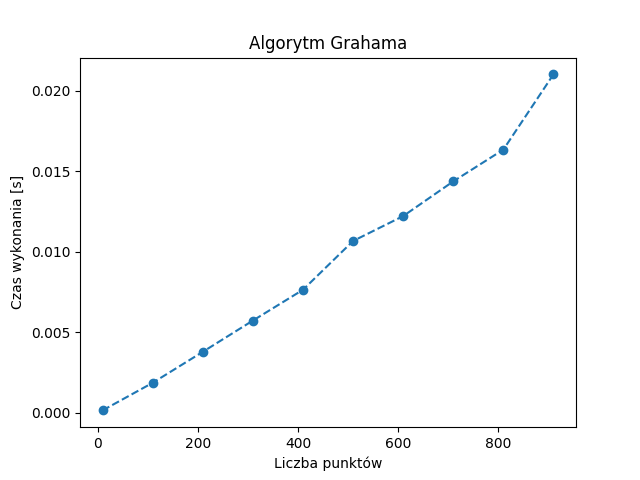

In [14]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-chmura-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


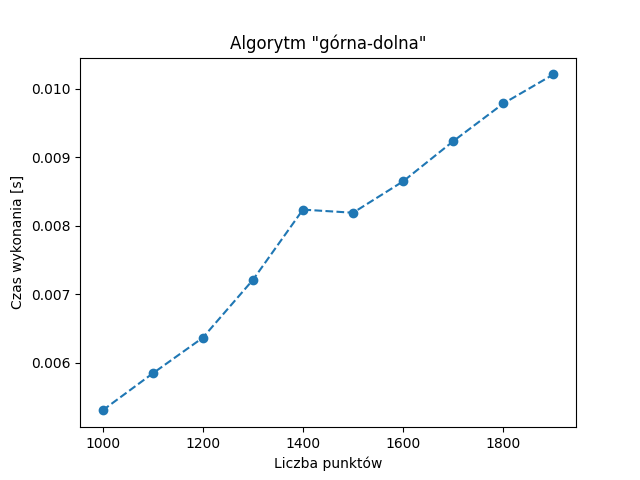

In [17]:
%matplotlib notebook


generate_plot([ns], [exectimes_a[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-chmura-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


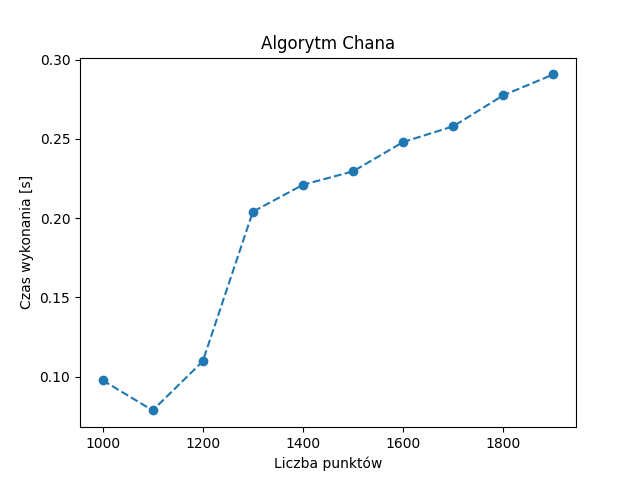

In [18]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-chmura-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


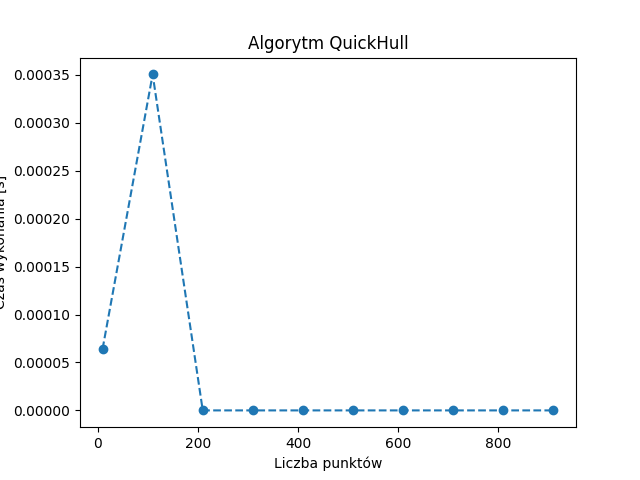

In [46]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm przyrostowy

<IPython.core.display.Javascript object>


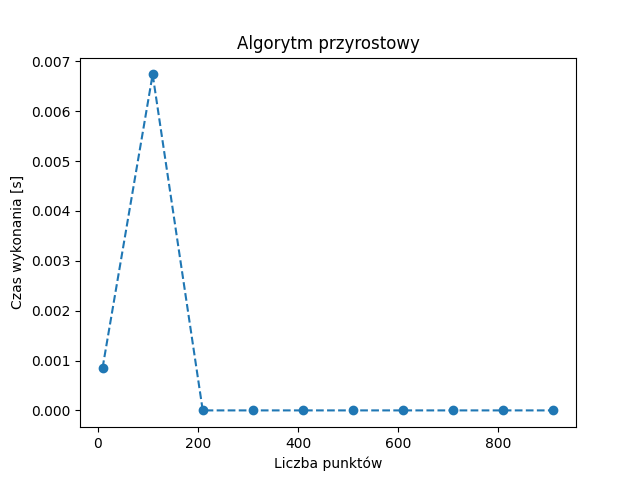

In [45]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm przyrostowy')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-chmura-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


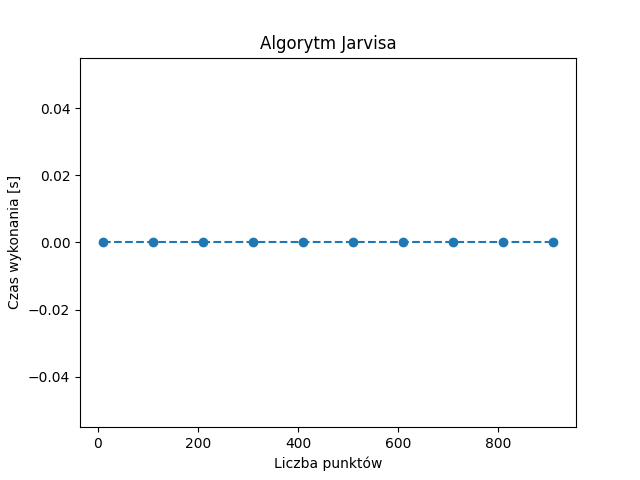

In [15]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[5]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-chmura-zbiorczy"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


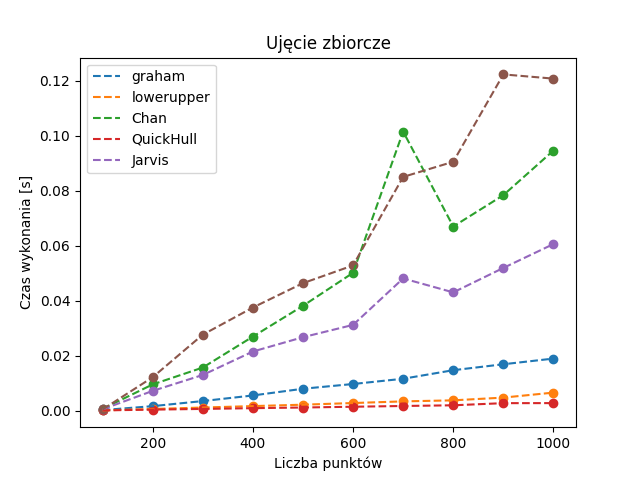

In [79]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_a))], exectimes_a, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

<a id='section_id'></a>

### Rozkład kołowy
<a id="pomiary-kolo"></a>
[Spis treści](#spis)

<a id='section_id'></a>

In [75]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 100 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_b = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeBset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_b[fi][i] = avg_exec_time(func, 10, points=points)
            continue
        
        print(func, n)
        exectimes_b[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/circle', exectimes_b)
    
pprint(exectimes_b)

<function graham at 0x7f26f88531f0> 100
<function lower_upper at 0x7f26f65ce3a0> 100
<function chan at 0x7f26f65c6b80> 100
<function quickHull at 0x7f26f65ce790> 100
<function jarvis at 0x7f26f8b148b0> zmieniam na np.array
<function jarvis at 0x7f26f8b148b0> 100
<function graham at 0x7f26f88531f0> 200
<function lower_upper at 0x7f26f65ce3a0> 200
<function chan at 0x7f26f65c6b80> 200
<function quickHull at 0x7f26f65ce790> 200
<function jarvis at 0x7f26f8b148b0> zmieniam na np.array
<function jarvis at 0x7f26f8b148b0> 200
<function graham at 0x7f26f88531f0> 300
<function lower_upper at 0x7f26f65ce3a0> 300
<function chan at 0x7f26f65c6b80> 300
<function quickHull at 0x7f26f65ce790> 300
<function jarvis at 0x7f26f8b148b0> zmieniam na np.array
<function jarvis at 0x7f26f8b148b0> 300
<function graham at 0x7f26f88531f0> 400
<function lower_upper at 0x7f26f65ce3a0> 400
<function chan at 0x7f26f65c6b80> 400
<function quickHull at 0x7f26f65ce790> 400
<function jarvis at 0x7f26f8b148b0> zmieniam 

<a id='section_id'></a>

### Algorytm Grahama
<a id="pomiary-kolo-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


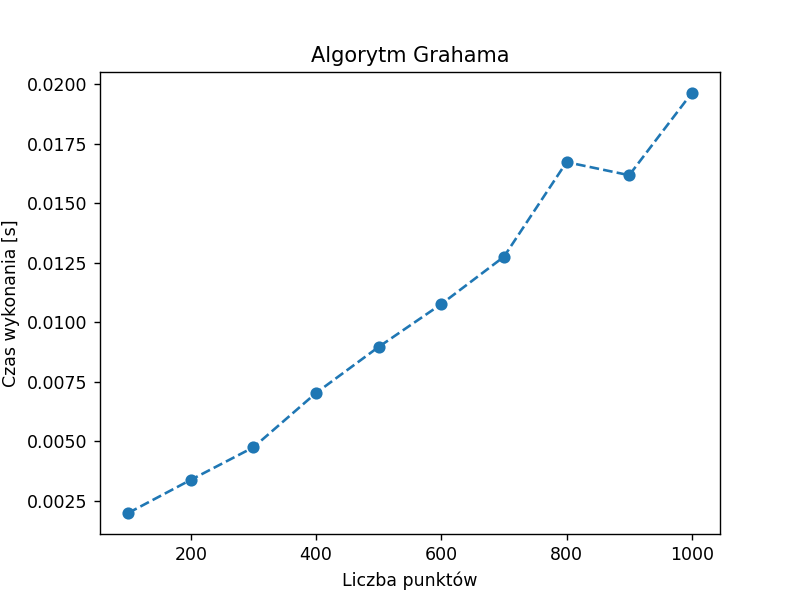

In [19]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algortym "górna-dolna"
<a id="pomiary-kolo-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


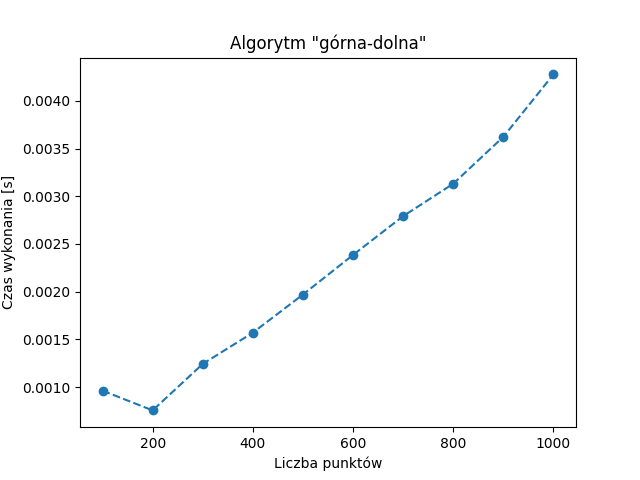

In [76]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-kolo-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


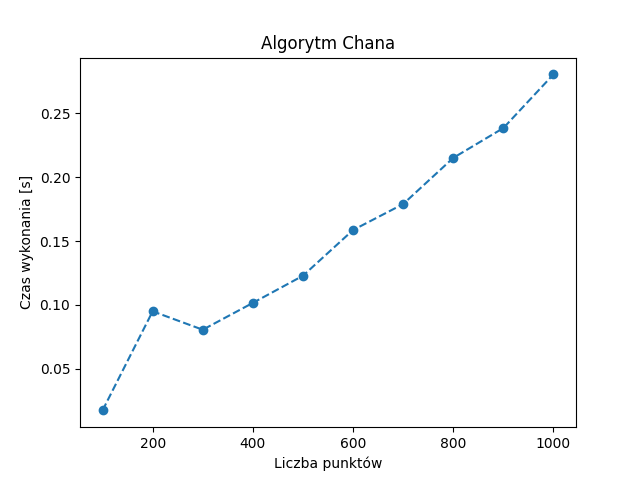

In [77]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-kolo-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


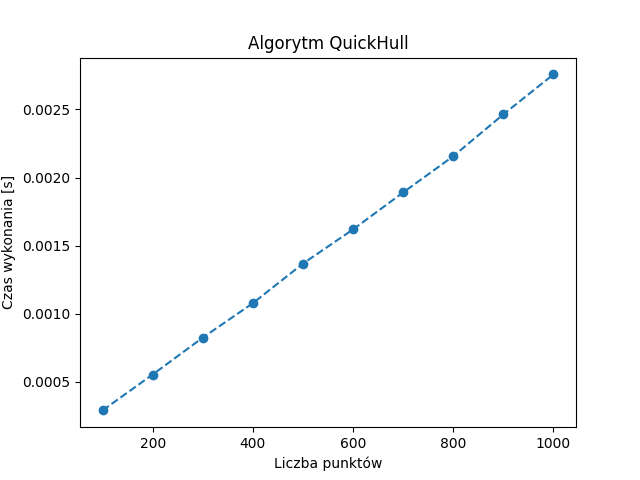

In [78]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-kolo-jarvis"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


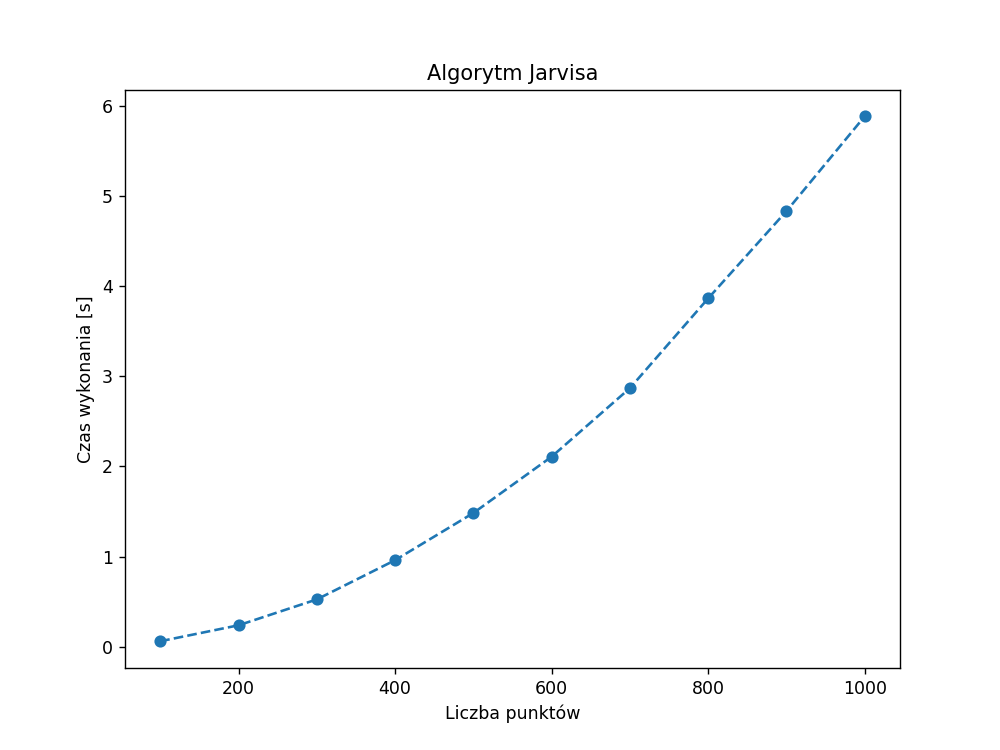

In [23]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-kolo-zbiorczy"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


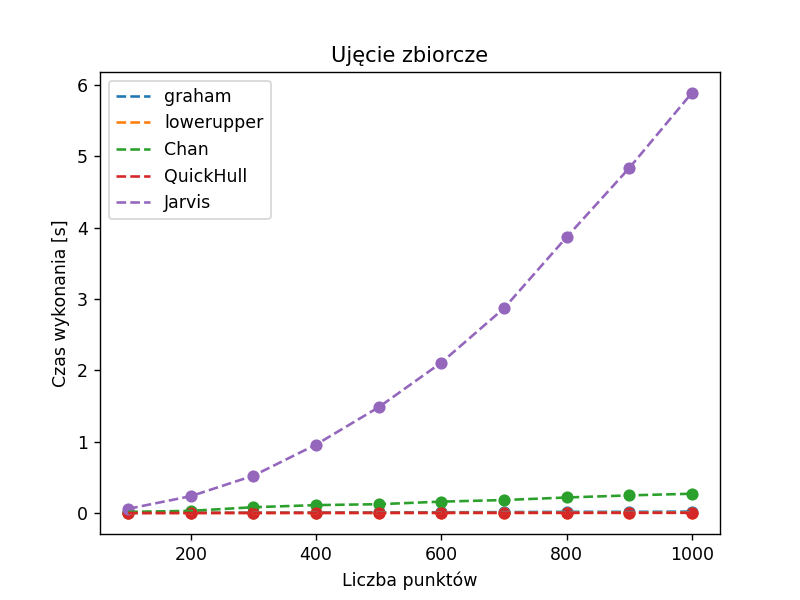

In [24]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b))], exectimes_b, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmu Jarvisa
<a id="pomiary-kolo-zbiorczy-2"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


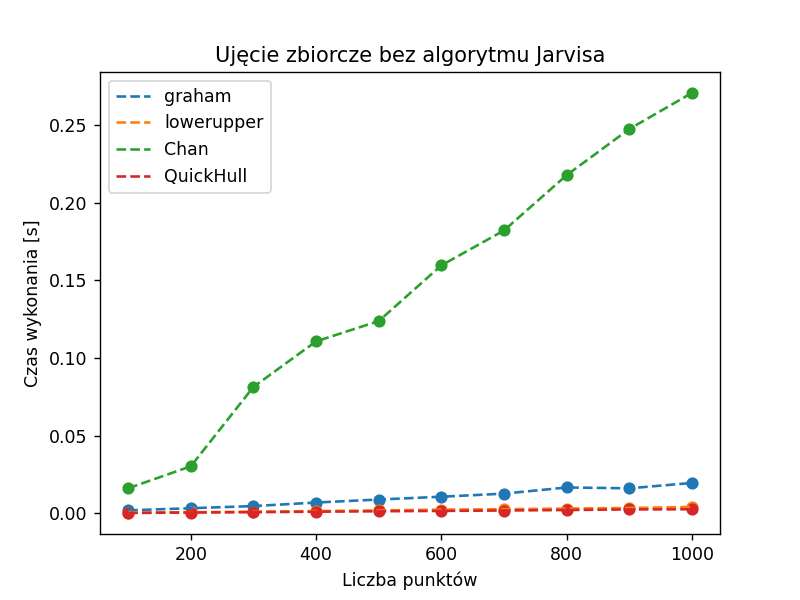

In [25]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b) - 1)], exectimes_b[:len(exectimes_b)-1], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze bez algorytmu Jarvisa')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull'))
plt.show()

### Losowy rozkład na prostokącie
<a id="pomiary-prost"></a>
[Spis treści](#spis)

In [44]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 10 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_c = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeCset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            print(func, n)
            exectimes_c[fi][i] = avg_exec_time(func, 20, points=points)
            continue
        
        print(func, n)
        exectimes_c[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/rect', exectimes_c)
pprint(exectimes_c)

<function graham at 0x7f7ceb3f40d0> 10
<function lower_upper at 0x7f7cea3fd550> 10
<function chan at 0x7f7cea1cfd30> 10
<function quickHull at 0x7f7cea3fd940> 10
<function jarvis at 0x7f7ceb3d6430> zmieniam na np.array
<function jarvis at 0x7f7ceb3d6430> 10
<function graham at 0x7f7ceb3f40d0> 110
<function lower_upper at 0x7f7cea3fd550> 110
<function chan at 0x7f7cea1cfd30> 110
<function quickHull at 0x7f7cea3fd940> 110
<function jarvis at 0x7f7ceb3d6430> zmieniam na np.array
<function jarvis at 0x7f7ceb3d6430> 110
<function graham at 0x7f7ceb3f40d0> 210
<function lower_upper at 0x7f7cea3fd550> 210
<function chan at 0x7f7cea1cfd30> 210
<function quickHull at 0x7f7cea3fd940> 210
<function jarvis at 0x7f7ceb3d6430> zmieniam na np.array
<function jarvis at 0x7f7ceb3d6430> 210
<function graham at 0x7f7ceb3f40d0> 310
<function lower_upper at 0x7f7cea3fd550> 310
<function chan at 0x7f7cea1cfd30> 310
<function quickHull at 0x7f7cea3fd940> 310
<function jarvis at 0x7f7ceb3d6430> zmieniam na np

KeyboardInterrupt: 

### Algorytm Grahama
<a id="pomiary-prost-graham"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-prost-gornadolna"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-prost-chan"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-prost-quickhull"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-prost-jarvis"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_c[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-prost-zbiorczy"></a>
[Spis treści](#spis)

In [ ]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_c))], exectimes_c, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku
<a id="pomiary-kw"></a>
[Spis treści](#spis)

In [7]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 10 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_d = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeDset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_d[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_d[fi][i] = avg_exec_time(func, points=points.copy())
        
save_data_csv('./tests/square', exectimes_a)
        
    
pprint(exectimes_d)

NameError: name 'lower_upper' is not defined

### Algorytm Grahama
<a id="pomiary-kw-graham"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


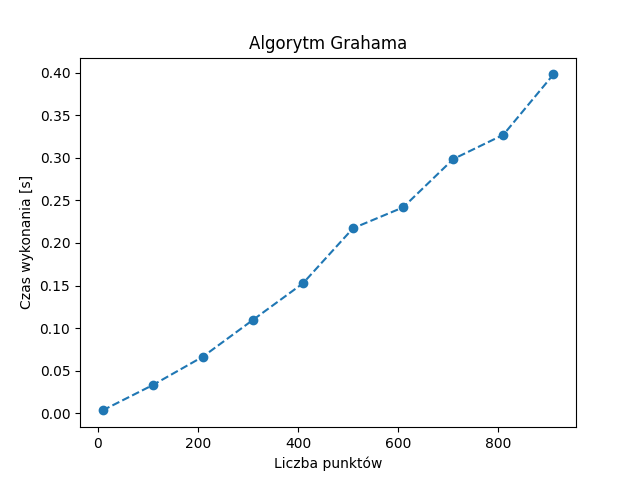

In [85]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"
<a id="pomiary-kw-gornadolna"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


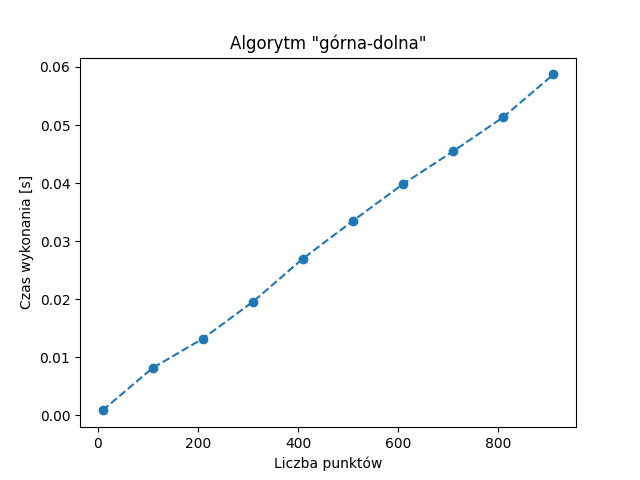

In [86]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana
<a id="pomiary-kw-chan"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


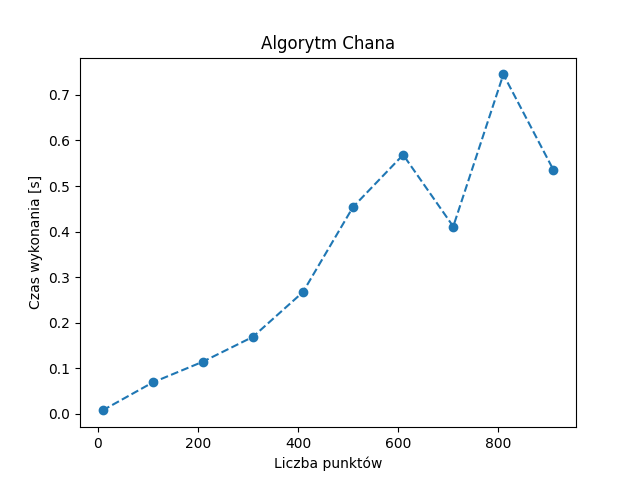

In [87]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull
<a id="pomiary-kw-quickhull"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


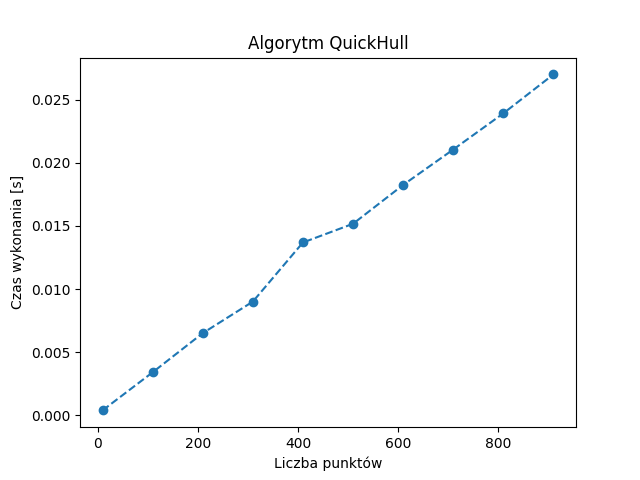

In [88]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm Jarvisa
<a id="pomiary-kw-jarvis"></a>
[Spis treści](#spis)

<IPython.core.display.Javascript object>


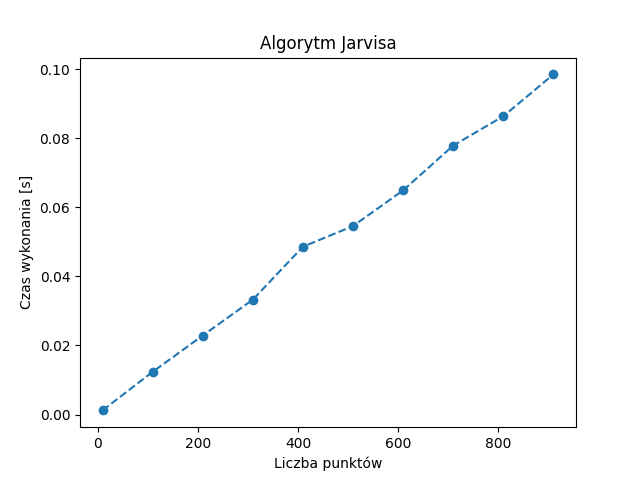

In [89]:
%matplotlib notebook

generate_plot([ns], [exectimes_d[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze
<a id="pomiary-kw-zbiorczy"></a>
[Spis treści](#spis)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


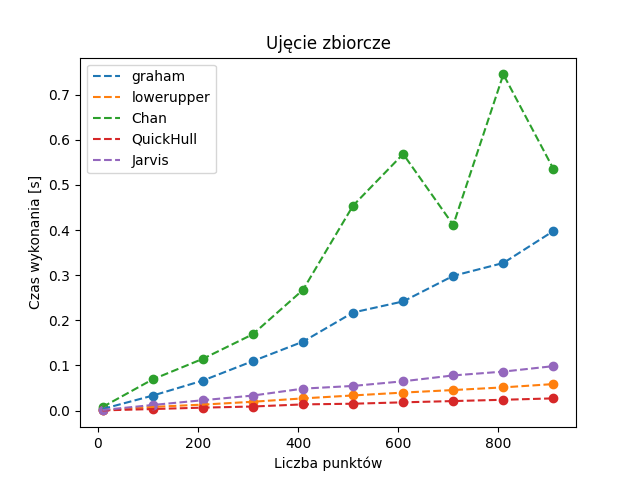

In [91]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_d))], exectimes_d, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

<a id='section_id'></a>